# Working with dataframes

In [2]:
import pandas as pd

## Common dataframe operations

Selecting, or subset selections of data like columns and rows are very common when working with datasets that might have data that is not interesting or needs to be dropped.

In [2]:
csv_url = "https://raw.githubusercontent.com/paiml/wine-ratings/main/wine-ratings.csv"

df  = pd.read_csv(csv_url, index_col = 0)

df.head(5)

,name,grape,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


### Dataframe columns

Select specific columns from dataframe.

In [3]:
wine_notes = df["notes"]
wine_notes.head()

0    This is a very special, limited release of 100...
1    The California Gold Rush was a period of coura...
2    The California Gold Rush was a period of coura...
3    The wine has a deep, rich purple color. An int...
4    Batch #004 is the first release of the 2014 vi...
Name: notes, dtype: object

In [4]:
named_ratings = df[["name", "rating"]]
named_ratings.head()

,name,rating
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,91.0
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,89.0
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,90.0
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,91.0
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,90.0


### Specific dataframe rows

Filter rows based on a condition.

In [7]:
top_named_ratings = named_ratings[named_ratings["rating"] > 96]
top_named_ratings.head(8)

,name,rating
218,Abreu Vineyards Cappella 2010,98.0
220,Abreu Vineyards Howell Mountain 2009,98.0
221,Abreu Vineyards Las Posadas Howell Mountain 2012,99.0
223,Abreu Vineyards Madrona Ranch 1996,98.0
227,Abreu Vineyards Madrona Ranch 2005,98.0
229,Abreu Vineyards Thorevilos 2009,98.0
230,Abreu Vineyards Thorevilos 2012,99.0
231,Abreu Vineyards Thorevilos 2014,97.0


In [9]:
named_ratings["rating"] > 96

0        False
1        False
2        False
3        False
4        False
         ...  
32775    False
32776    False
32777    False
32778    False
32779    False
Name: rating, Length: 32780, dtype: bool

### Using queries

* Use these methods from the Dataframe.

In [10]:
df.query("rating > 96").head()

,name,grape,region,variety,rating,notes
218,Abreu Vineyards Cappella 2010,NaN,"Napa Valley, California",Red Wine,98.0,Cappella is one of the oldest vineyard sites i...
220,Abreu Vineyards Howell Mountain 2009,NaN,"Howell Mountain, Napa Valley, California",Red Wine,98.0,"As a set of wines, it is hard to surpass the f..."
221,Abreu Vineyards Las Posadas Howell Mountain 2012,NaN,"Howell Mountain, Napa Valley, California",Red Wine,99.0,"At about 2000 feet elevation, Las Posadas sits..."
223,Abreu Vineyards Madrona Ranch 1996,NaN,"Napa Valley, California",Red Wine,98.0,Abreu Madrona Ranch is a blend of Cabernet Sau...
227,Abreu Vineyards Madrona Ranch 2005,NaN,"Napa Valley, California",Red Wine,98.0,Abreu Madrona Ranch is a blend of Cabernet Sau...


* Add more combined queries.

In [13]:
df.query("rating > 94 & region == 'Ribera del Duero, Spain'").head()

,name,grape,region,variety,rating,notes
110,Aalto 2005,NaN,"Ribera del Duero, Spain",Red Wine,95.0,The grapes come exclusively from old vineyards...
111,Aalto 2007,NaN,"Ribera del Duero, Spain",Red Wine,95.0,It is ironic that one of the youngest properti...
113,Aalto 2008,NaN,"Ribera del Duero, Spain",Red Wine,95.0,This wine's elegance and fruitful presence per...
121,Aalto 2016,NaN,"Ribera del Duero, Spain",Red Wine,95.0,"Deep purple red color, as corresponds to old T..."
123,Aalto PS 2013,NaN,"Ribera del Duero, Spain",Red Wine,95.0,Aalto PS (Pagos Seleccionada) is made only in ...


* Chain queries to use the Python engine to operate on strings.

In [18]:
top_wines = df.query("rating > 95")
paso_robles = top_wines.query("region.str.contains('Robles', na = False)", engine = 'python')
paso_robles.head()

,name,grape,region,variety,rating,notes
3050,Austin Hope Cabernet Sauvignon 2016,NaN,"Paso Robles, Central Coast, California",Red Wine,96.0,"Deep ruby in color, the 2016 Austin Hope Caber..."
6272,Booker Vineyard Estate 24 2014,NaN,"Paso Robles, Central Coast, California",Red Wine,96.0,"Blend: 51% Tempranillo, 28% Syrah, 13% Petit V..."
6273,Booker Vineyard Estate Syrah Blend 2013,NaN,"Paso Robles, Central Coast, California",Red Wine,96.0,"Fashioned after the old Alchemist, this wine w..."
6277,Booker Vineyard Fracture Syrah 2011,NaN,"Paso Robles, Central Coast, California",Red Wine,97.0,Just over half of our property is planted with...
6284,Booker Vineyard Jada 2015,NaN,"Paso Robles, Central Coast, California",Red Wine,96.0,This Grenache heavy wine is very elegant and p...


## Manipulating text in dataframes

Python calls it *manipulating textual data*.

* Manipulate the variety to be R for red or W for white.

In [19]:
df["variety_short"] = df["variety"].replace({"Red Wine": "R",
                                             "White Wine": "W"})
df.head(10)

,name,grape,region,variety,rating,notes,variety_short
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100...",R
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...,R
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...,R
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int...",R
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...,R
5,1000 Stories Bourbon Barrel Aged Zinfandel 2016,NaN,California,Red Wine,91.0,"1,000 Stories Bourbon barrel-aged Zinfandel is...",R
6,1000 Stories Bourbon Barrel Aged Zinfandel 2017,NaN,California,Red Wine,92.0,"Batch 55 embodies an opulent vintage, which sa...",R
7,12 Linajes Crianza 2014,NaN,"Ribera del Duero, Spain",Red Wine,92.0,Red with violet hues. The aromas are very inte...,R
8,12 Linajes Reserva 2012,NaN,"Ribera del Duero, Spain",Red Wine,94.0,"On the nose, a complex predominance of mineral...",R
9,14 Hands Cabernet Sauvignon 2010,NaN,"Columbia Valley, Washington",Red Wine,87.0,Concentrated aromas of dark stone fruits and t...,R


* Split the region and keep only the last part.

In [20]:
df["region_short"] = df["region"].str.split().str.get(-1)
df.query("region_short != 'California'").head()

,name,grape,region,variety,rating,notes,variety_short,region_short
7,12 Linajes Crianza 2014,NaN,"Ribera del Duero, Spain",Red Wine,92.0,Red with violet hues. The aromas are very inte...,R,Spain
8,12 Linajes Reserva 2012,NaN,"Ribera del Duero, Spain",Red Wine,94.0,"On the nose, a complex predominance of mineral...",R,Spain
9,14 Hands Cabernet Sauvignon 2010,NaN,"Columbia Valley, Washington",Red Wine,87.0,Concentrated aromas of dark stone fruits and t...,R,Washington
10,14 Hands Cabernet Sauvignon 2011,NaN,"Columbia Valley, Washington",Red Wine,89.0,Concentrated aromas of dark stone fruits and t...,R,Washington
11,14 Hands Cabernet Sauvignon 2015,NaN,"Columbia Valley, Washington",Red Wine,89.0,"The 14 Hands Cabernet Sauvignon is a rich, jui...",R,Washington


## Applying functions with Pandas

One of the key concepts in Pandas is that you can apply functions to the dataframe itself. This differs from how data manipulation is done usually in Python, where loops and new data structures is primarily how you end up operating.

In [9]:
csv_url = "https://raw.githubusercontent.com/paiml/wine-ratings/main/wine-ratings.csv"
df = pd.read_csv(csv_url, index_col = 0)
df.head()

,name,grape,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


In [16]:
def good_wine(value):
    if value > 94:
        return 1
    return 0

df['good'] = df['rating'].apply(good_wine)
df.query('rating > 94').head()

,name,grape,region,variety,rating,notes,good
36,3 Rings Reserve Shiraz 2004,NaN,"Barossa Valley, Barossa, South Australia, Aust...",Red Wine,96.0,Vintage Comments : Classic Barossa vintage con...,1
110,Aalto 2005,NaN,"Ribera del Duero, Spain",Red Wine,95.0,The grapes come exclusively from old vineyards...,1
111,Aalto 2007,NaN,"Ribera del Duero, Spain",Red Wine,95.0,It is ironic that one of the youngest properti...,1
113,Aalto 2008,NaN,"Ribera del Duero, Spain",Red Wine,95.0,This wine's elegance and fruitful presence per...,1
121,Aalto 2016,NaN,"Ribera del Duero, Spain",Red Wine,95.0,"Deep purple red color, as corresponds to old T...",1


## Visualizing data with Pandas

matplotlib is able to produce meaningful data plots right in a notebook with little effort using Pandas Dataframes. This notebook covers a few of those capabilitites.

In [17]:
csv_url = "https://raw.githubusercontent.com/paiml/wine-ratings/main/wine-ratings.csv"
df = pd.read_csv(csv_url, index_col = 0)
df.drop('grape', axis = 1, inplace = True)
df = df.dropna()
df.head()

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


In [18]:
df['rating'] = df['rating'].apply(lambda x: int(x))

<AxesSubplot:>

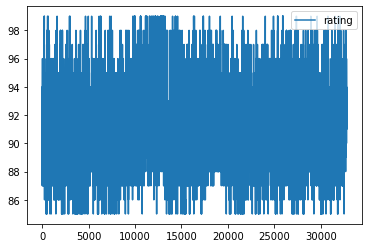

In [19]:
df.plot()

<AxesSubplot:>

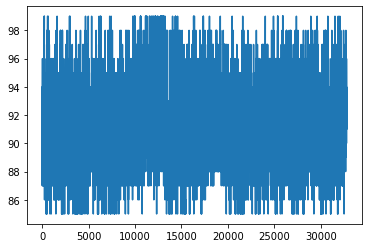

In [20]:
df["rating"].plot()

<AxesSubplot:xlabel='rating', ylabel='variety'>

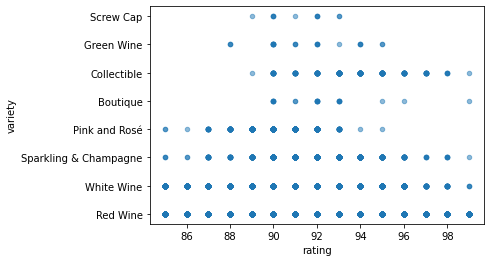

In [25]:
df.plot.scatter(x = "rating", y = "variety", alpha = 0.5)